1. RNN 연속적인 데이터
    - 순서를 고려
    - 시퀀스는 특별함
    - 순차 데이터에서 데이터 포인트사이의 순서가 중요
2. 시퀀스 모델링 종류
    - 시퀀스 모델링에는 언어번역 이미지 캡셔닝 텍스트 생성등
    - 적절한 구조와 방법을 찾으려면 여러 종류의 시퀀스 모델링 작업 사이의 차이점을 이해 
    - 다대일 :입력데이터가 시퀀스지만 출력은 시퀀스가 아님
        - 크기가의 벡터나 스칼라
    - 일대다: 입력 데이터가 시퀀스가 아니라 일반적인 형태이고 출력은 시퀀스
        - 이미지 캡셔닝이 있다. 입력이 이미지/ 출력이 이미지내용을 요약
    - 
    

In [1]:
from tensorflow.keras.datasets.imdb import load_data
(x_data,y_data),(tt_x,tt_y) = load_data(num_words= 500) # 표현할 단어의 종류
x_data.shape


(25000,)

In [2]:
len(x_data[0]),len(x_data[1])

(218, 189)

In [3]:
y_data[:5]#긍정 부정

array([1, 0, 0, 1, 0], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_t = train_test_split(x_data, y_data,test_size=0.2,random_state=42)


(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

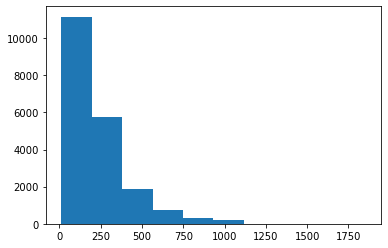

In [5]:
import numpy as np
l = np.array([len(i)for i in t_x])
import matplotlib.pyplot as plt
plt.hist(l)

In [6]:
np.median(l)#중간값

178.0

In [7]:
#스케일 작업 위작업으로 정형화됨
from tensorflow.keras.preprocessing.sequence import pad_sequences
s_t_x = pad_sequences(t_x,maxlen=100) #100 가지로 줄임

In [8]:
s_t_x.shape

(20000, 100)

In [9]:
s_v_x = pad_sequences(v_x,maxlen=100)

In [10]:
from tensorflow import keras
m = keras.Sequential()

In [11]:
m.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
m.add(keras.layers.Dense(1,activation='sigmoid'))

In [12]:
t_ho = keras.utils.to_categorical(s_t_x)

In [13]:
t_ho.shape

(20000, 100, 500)

In [14]:
v_ho = keras.utils.to_categorical(s_v_x)

In [15]:
v_ho.shape

(5000, 100, 500)

In [16]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [17]:
ot = keras.optimizers.RMSprop(learning_rate=1e-4)
m.compile(optimizer=ot,loss = 'binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5',
                                       save_best_only=True)
e_st = keras.callbacks.EarlyStopping(patience=3
                                     ,restore_best_weights=True)
hy = m.fit(t_ho,t_y,epochs=100,batch_size=64, validation_data=(v_ho,v_t)
          ,callbacks=[ck_p,e_st])

Epoch 1/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6959 - accuracy: 0.5067 - val_loss: 0.6950 - val_accuracy: 0.5012
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6927 - accuracy: 0.5178 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6910 - accuracy: 0.5280 - val_loss: 0.6916 - val_accuracy: 0.5154
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6896 - accuracy: 0.5384 - val_loss: 0.6908 - val_accuracy: 0.5244
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6882 - accuracy: 0.5473 - val_loss: 0.6899 - val_accuracy: 0.5274
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6867 - accuracy: 0.5543 - val_loss: 0.6890 - val_accuracy: 0.5352
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6853 - accuracy: 0.5584 - val_loss: 0.6881 - val_accuracy:

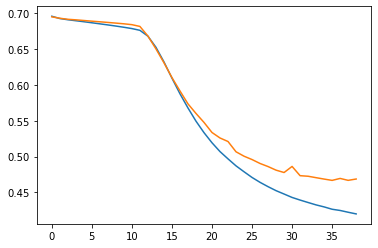

In [18]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [34]:

m1 = keras.Sequential()
m1.add(keras.layers.Embedding(500,16,input_length=100))
m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1,activation='sigmoid'))
ot1 = keras.optimizers.RMSprop(learning_rate=1e-4)
m1.compile(optimizer=ot1,loss = 'binary_crossentropy',metrics='accuracy')
ck_p2 = keras.callbacks.ModelCheckpoint('Ex2_emd.h5',
                                       save_best_only=True)
e_st2 = keras.callbacks.EarlyStopping(patience=3
                                     ,restore_best_weights=True)
hy1 = m1.fit(s_t_x,t_y,epochs=100,batch_size=64,
             validation_data=(s_v_x,v_t),callbacks=[ck_p2,e_st2])

Epoch 1/100
313/313 [==============================] - 7s 19ms/step - loss: 0.6951 - accuracy: 0.5167 - val_loss: 0.6953 - val_accuracy: 0.5088
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6895 - accuracy: 0.5344 - val_loss: 0.6925 - val_accuracy: 0.5166
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6848 - accuracy: 0.5528 - val_loss: 0.6907 - val_accuracy: 0.5240
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6799 - accuracy: 0.5734 - val_loss: 0.6879 - val_accuracy: 0.5370
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6742 - accuracy: 0.5907 - val_loss: 0.6852 - val_accuracy: 0.5476
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6673 - accuracy: 0.6037 - val_loss: 0.6813 - val_accuracy: 0.5592
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6597 - accuracy: 0.6117 - val_loss: 0.6779 - val_accuracy:

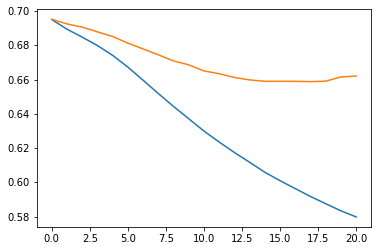

In [36]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])

In [28]:
(x_data, y_data),(tt_x,tt_y) = load_data(num_words=500)
t_x,v_x,t_y,v_y = train_test_split(x_data, y_data,test_size=0.2,random_state=42)


In [29]:
s_t_x = pad_sequences(t_x,maxlen=100)
s_v_x = pad_sequences(v_x,maxlen=100)

In [30]:
m2 = keras.Sequential()
m2.add(keras.layers.Embedding(500,16,input_length=100))
m2.add(keras.layers.LSTM(8,dropout=0.3))
m2.add(keras.layers.Dense(1,activation='sigmoid'))

In [33]:
ot1 = keras.optimizers.RMSprop(learning_rate=1e-4)
m2.compile(optimizer=ot1,loss = 'binary_crossentropy',metrics='accuracy')
ck_p2 = keras.callbacks.ModelCheckpoint('Ex2_LSTM.h5',
                                       save_best_only=True)
e_st2 = keras.callbacks.EarlyStopping(patience=3
                                     ,restore_best_weights=True)
hy2 = m2.fit(s_t_x,t_y,epochs=100,
             batch_size=64,validation_data=(s_v_x,v_y),callbacks=[ck_p2,e_st2])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6923 - accuracy: 0.5444 - val_loss: 0.6918 - val_accuracy: 0.5740
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6906 - accuracy: 0.5942 - val_loss: 0.6895 - val_accuracy: 0.6116
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6867 - accuracy: 0.6132 - val_loss: 0.6836 - val_accuracy: 0.6338
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6661 - accuracy: 0.6220 - val_loss: 0.6379 - val_accuracy: 0.6534
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6121 - accuracy: 0.7178 - val_loss: 0.5993 - val_accuracy: 0.7344
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5877 - accuracy: 0.7344 - val_loss: 0.5785 - val_accuracy: 0.7480
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5700 - accuracy: 0.7463 - val_loss: 0.5647 - val_accura

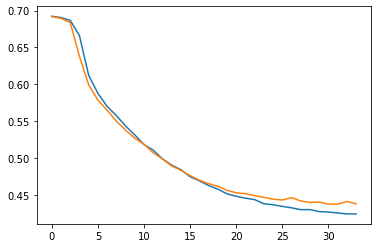

In [35]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [ ]:
m3 = keras.Sequential()
m3.add(keras.layers.Embedding(500,16,input_length=100))
m3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
m3.add(keras.layers.LSTM(8,dropout=0.3))
m3.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
m4 = keras.Sequential()
m4.add(keras.layers.Embedding(500,16,input_length=100))
m4.add(keras.layers.GRU(8,dropout=0.3,return_sequences=True))
m4.add(keras.layers.LSTM(8,dropout=0.3))
m4.add(keras.layers.Dense(1,activation='sigmoid'))